# Вводные

## Цель работы

изучение методов кластеризации

## Задание 

1. Выбрать массив данных (рекомендуются базы по ссылкам No 3-4 из 
списка  литературы),  описать  параметры.  Примечание:  тип  задачи 
«классификация», «кластеризация». 
2. Провести  дескриптивный  анализ,  оценить  близость  выборок  к 
нормальной.  В  соответствии  с  результатами  обосновать  выбор 
методов кластеризации. 
3. Стандартизировать переменные. 
4. Изучить  пример  решения  задачи  кластеризации  (ссылка  No2  из 
списка литературы). 
5. Построить  диаграммы  рассеивания  (составные  диаграммы 
рассеивания,  категоризованные  диаграммы  рассеяния)  по 
выбранным  переменным.  Интерпретировать  результаты,  оценить 
возможное количество кластеров. 
6. Решить  задачу  кластеризации  двумя  методами  (k-средних, 
иерархический, EM, DBSCAN, карта Кохонена и др). 
7. Оценить  качество  построенных  моделей  (в  т.ч.  расстояние  между 
кластерами, внутрикластерные расстояния, компактность кластеров, 
центры кластеров и т.д.). 
8. Провести сравнительный анализ решений. 
9. Исследовать  влияние  параметров  одного  из  методов  на  качество 
решения, оценить полученные результаты. 
10. Интерпретировать результаты. 
11. Оформить отчет. 
 
Содержание отчета 
1. Титульный лист. 
2. Цель работы. 
3. Описание исходных данных. 
4. Результаты дескриптивного анализа. 
5. Диаграммы рассеивания. 
6. Интерпретация результатов (количество кластеров). 
7. Обоснование выбора методов кластеризации. 
8. Параметры выбранных методов. 
9. Оценка адекватности полученных решений. 
10. Сравнительный анализ решений и интерпретация результатов. 
11. Результаты  исследования  влияния  параметров  алгоритма  на 
качество решения.  


# Основная часть

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt
import seaborn as sns


## Описание исходных данных

Датасет представляет из себя набор данных об учащихся:
1. Id - уникальный номер учащегося (строка)
2. Exam -тип экзамена (категориальная переменная)
3. Score - набранный балл (число)
4. Advanced - обучался ли в специализированном классе (категория)

In [36]:
eng = pd.read_csv('eng_test.csv', sep=';')
eng.head()

,Id,Exam,Score,Advanced
0,ID1,TOEFL,77.0,NO
1,ID10,TOEFL,105.0,NO
2,ID100,TOEFL,107.0,YES
3,ID101,TOEFL,72.0,NO
4,ID102,TOEFL,120.0,YES


In [37]:
len(eng)

274

### Препроцессинг

Id не несет в себе уникальной информации и представляет из себя некоторый порядковый номер. Обезличим данные.

In [38]:
print(len(eng['Id'].unique()) == len(eng))

eng = eng.drop(columns='Id')
eng.head()

True


,Exam,Score,Advanced
0,TOEFL,77.0,NO
1,TOEFL,105.0,NO
2,TOEFL,107.0,YES
3,TOEFL,72.0,NO
4,TOEFL,120.0,YES


Стадартизируем переменную Score

In [39]:
eng['Score'] = pd.DataFrame(StandardScaler().fit_transform(eng[['Score']]))

eng.head()

,Exam,Score,Advanced
0,TOEFL,0.680342,NO
1,TOEFL,1.300429,NO
2,TOEFL,1.344721,YES
3,TOEFL,0.569612,NO
4,TOEFL,1.632618,YES


In [40]:
eng['Score'].mean()

0.0

## Дискрептивный анализ

In [41]:
eng.head()

,Exam,Score,Advanced
0,TOEFL,0.680342,NO
1,TOEFL,1.300429,NO
2,TOEFL,1.344721,YES
3,TOEFL,0.569612,NO
4,TOEFL,1.632618,YES


##

Основные метрики

In [46]:
mean_score = eng['Score'].mean()
median_score = eng['Score'].median()
max_score = eng['Score'].max()
min_score = eng['Score'].min()
std_dev_score = eng['Score'].std()
var_score = eng['Score'].var()
kurtosis_score = kurtosis(eng['Score'], fisher=True)
skewness_score = skew(eng['Score'])
q1_score = eng['Score'].quantile(0.25)
q3_score = eng['Score'].quantile(0.75)

descriptive_stats = pd.DataFrame({
    "Метрика": ["Среднее", "Максимальное","Минимальное", "Медиана", "Стандартное отклонение", "Дисперсия", 
                "Эксцесс", "Асимметрия", "25-й процентиль (Q1)", "75-й процентиль (Q3)"],
    "Значение": [mean_score,max_score, min_score, median_score, std_dev_score, var_score, 
                 kurtosis_score, skewness_score, q1_score, q3_score]
})

descriptive_stats


,Метрика,Значение
0,Среднее,0.000000
1,Максимальное,1.632618
2,Минимальное,-0.936313
3,Медиана,-0.831120
4,Стандартное отклонение,1.001830
5,Дисперсия,1.003663
6,Эксцесс,-1.688155
7,Асимметрия,0.355642
8,25-й процентиль (Q1),-0.880949
9,75-й процентиль (Q3),0.990385


Визуализация квантилей

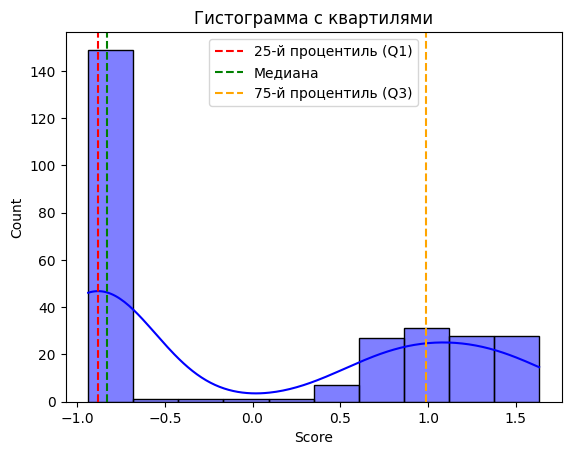

In [ ]:
sns.histplot(eng['Score'], kde=True, color='blue')
plt.axvline(x=q1_score, color='red', linestyle='--', label='25-й процентиль (Q1)')
plt.axvline(x=median_score, color='green', linestyle='--', label='Медиана')
plt.axvline(x=q3_score, color='orange', linestyle='--', label='75-й процентиль (Q3)')
plt.title('Гистограмма с квартилями')
plt.legend()
plt.show()


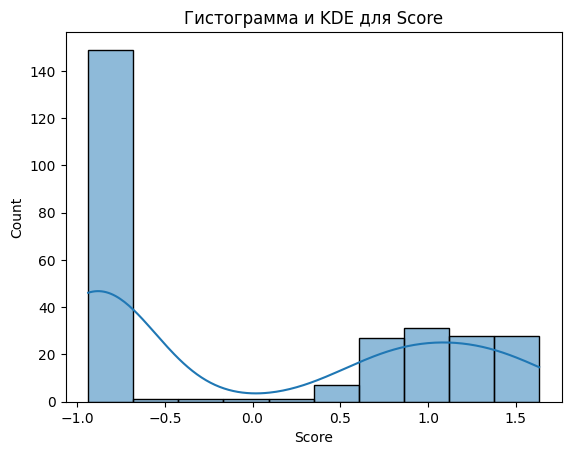

Шапиро-Уилк: Stat=0.7577879647638587, p=8.666383413870224e-20
Данные не соответствуют нормальному распределению
Андерсон-Дарлинг:
AndersonResult(statistic=30.415716974200052, critical_values=array([0.568, 0.647, 0.776, 0.905, 1.077]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.0, scale=1.0018298276968018)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Данные не соответствуют нормальному распределению


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, anderson

# Визуализация распределения
sns.histplot(eng['Score'], kde=True)
plt.title("Гистограмма и KDE для Score")
plt.show()

# Тест Шапиро-Уилка
stat, p = shapiro(eng['Score'])
print(f"Шапиро-Уилк: Stat={stat}, p={p}")
if p > 0.05:
    print("Данные похожи на нормальное распределение")
else:
    print("Данные не соответствуют нормальному распределению")

# Дополнительный тест: Андерсона-Дарлинга
result = anderson(eng['Score'])
print("Андерсон-Дарлинг:")
print(result)
if result.statistic < result.critical_values[2]:  # Проверка по уровню значимости 5%
    print("Данные нормально распределены")
else:
    print("Данные не соответствуют нормальному распределению")
